# DL Assignment 2

Ishaan Reddy
SCDS
210200019

In [90]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

import glob
import PIL
from PIL import Image

2.10.1


In [91]:
# load numpy array from npy file
from numpy import load

X_train_std = load('/content/drive/MyDrive/DL_Models/X_train_std.npy')
X_test_std = load('/content/drive/MyDrive/DL_Models/X_test_std.npy')

y_train = load('/content/drive/MyDrive/DL_Models/y_train.npy')
y_test = load('/content/drive/MyDrive/DL_Models/y_test.npy')

In [92]:
print("X_train_std_shape: {}".format(X_train_std.shape))
print("X_test_std_shape: {}".format(X_test_std.shape))

X_train_std_shape: (389, 299, 299, 3)
X_test_std_shape: (130, 299, 299, 3)


In [93]:
ensemble_model1 = keras.models.load_model('/content/drive/MyDrive/DL_Models/01_Xception_FineTuned_Best_Model.h5')

In [94]:
ensemble_model2 = keras.models.load_model('/content/drive/MyDrive/DL_Models/02_Xception_FineTuned_Best_Model.h5')

In [118]:
ensemble_model3 = keras.models.load_model('/content/drive/MyDrive/DL_Models/03_Xception_FineTuned_Best_Model.h5')

### Ensemble Model 1 

In [96]:
y_proba1 = ensemble_model1.predict(X_test_std)

5/5 [==============================] - 15s 2s/step


In [97]:
y_predict = np.argmax(y_proba1, axis=-1)
print(y_predict)

[6 4 4 5 4 4 6 6 0 4 0 4 4 4 4 4 6 4 6 4 4 4 4 4 4 4 0 4 4 4 4 4 0 6 4 4 4
 4 4 4 6 4 4 4 6 4 4 4 4 0 4 4 4 4 0 4 6 4 4 4 4 6 4 6 6 4 6 6 4 4 4 4 4 4
 4 4 4 6 4 4 4 4 4 4 4 0 4 4 6 0 5 4 6 4 4 0 6 5 4 6 4 6 4 4 4 4 5 4 4 0 0
 4 4 4 4 6 4 6 4 6 6 6 5 0 4 4 6 4 0 4]


In [98]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test, y_pred = y_predict)

array([[ 2,  0,  0,  0, 14,  2,  5],
       [ 1,  0,  0,  0, 18,  0,  1],
       [ 1,  0,  0,  0,  6,  0,  3],
       [ 2,  0,  0,  0, 13,  0,  1],
       [ 0,  0,  0,  0, 19,  2,  0],
       [ 4,  0,  0,  0,  5,  0, 13],
       [ 3,  0,  0,  0, 11,  1,  3]], dtype=int64)

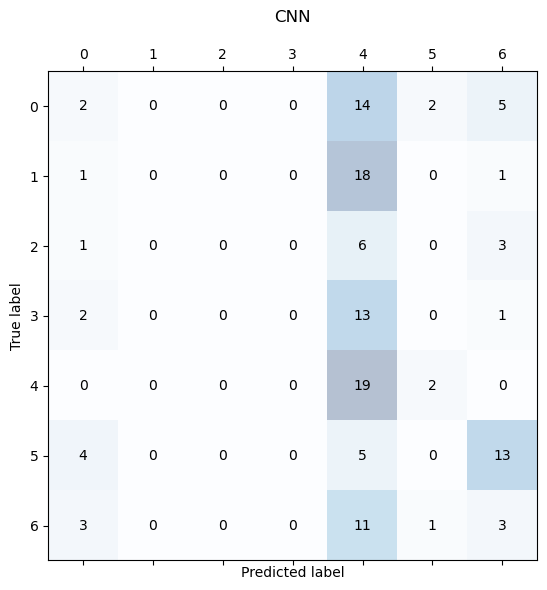

In [99]:
cm_1 = confusion_matrix(y_true = y_test, y_pred = y_predict)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm_1, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm_1.shape[0]):
    for j in range(cm_1.shape[1]):
        ax.text(x=j, y=i, s=cm_1[i, j], va='center', ha='center')

ax.title.set_text('CNN\n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig("ConfusionMatrix.png", dpi=300, format='png', pad_inches=0.3)
plt.show()

{0, 1, 2, 3, 4, 5, 6}

['african-wildcat' 'blackfoot-cat' 'chinese-mountain-cat' 'domestic-cat'
 'european-wildcat' 'jungle-cat' 'sand-cat']

In [100]:
from sklearn.metrics import precision_score, recall_score, f1_score

pScore1 = precision_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Precision: ", pScore1)

rScore1 = recall_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Recall: ", rScore1)

fScore1 = f1_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("F1-score: ", fScore1)

Precision:  0.07888399614696573
Recall:  0.18461538461538463
F1-score:  0.09590803796411274


C:\Users\ishaa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Ensemble Model 2 

In [101]:
y_proba2 = ensemble_model2.predict(X_test_std)

5/5 [==============================] - 28s 3s/step


In [102]:
y_predict = np.argmax(y_proba2, axis=-1)
print(y_predict)

[2 2 4 4 5 1 1 5 5 1 5 5 6 1 5 1 6 4 5 4 4 5 1 6 4 1 6 5 4 4 1 1 6 5 4 6 1
 4 4 6 5 5 1 5 5 5 4 4 5 5 5 4 4 6 5 5 5 6 5 5 6 5 4 4 5 6 5 5 1 1 6 5 5 6
 5 5 5 4 4 6 5 0 2 5 1 5 5 6 5 5 6 2 5 4 6 6 5 4 4 5 5 5 1 6 1 6 5 4 6 1 1
 6 6 5 4 5 5 5 6 6 6 5 5 2 1 6 5 4 5 0]


In [103]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test, y_pred = y_predict)

array([[ 0,  0,  0,  0,  1, 22,  0],
       [ 0, 17,  0,  0,  0,  1,  2],
       [ 1,  1,  5,  0,  1,  1,  1],
       [ 1,  0,  0,  0,  6,  6,  3],
       [ 0,  0,  0,  0, 17,  1,  3],
       [ 0,  1,  0,  0,  0, 21,  0],
       [ 0,  0,  0,  0,  0,  0, 18]], dtype=int64)

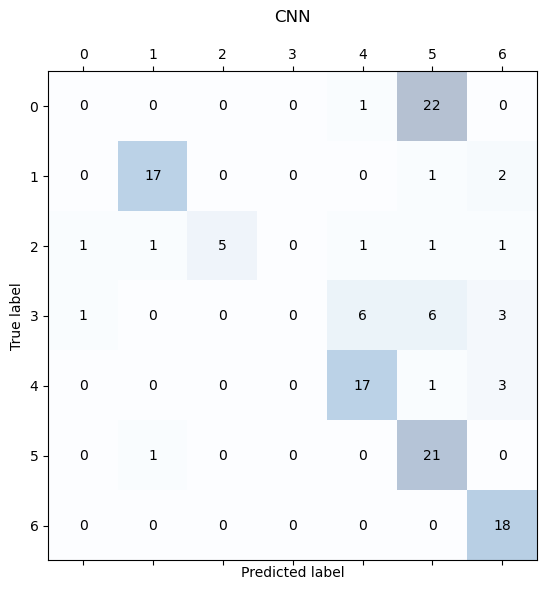

In [104]:
cm_2 = confusion_matrix(y_true = y_test, y_pred = y_predict)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm_2, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm_2.shape[0]):
    for j in range(cm_2.shape[1]):
        ax.text(x=j, y=i, s=cm_2[i, j], va='center', ha='center')

ax.title.set_text('CNN\n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig("ConfusionMatrix.png", dpi=300, format='png', pad_inches=0.3)
plt.show()

{0, 1, 2, 3, 4, 5, 6}

['african-wildcat' 'blackfoot-cat' 'chinese-mountain-cat' 'domestic-cat'
 'european-wildcat' 'jungle-cat' 'sand-cat']

In [105]:
from sklearn.metrics import precision_score, recall_score, f1_score

pScore2 = precision_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Precision: ", pScore2)

rScore2 = recall_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Recall: ", rScore2)

fScore2 = f1_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("F1-score: ", fScore2)

Precision:  0.48507194020554345
Recall:  0.6
F1-score:  0.5116214593806568


C:\Users\ishaa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Ensemble Model 3 

In [119]:
y_proba3 = ensemble_model3.predict(X_test_std)

5/5 [==============================] - 7s 773ms/step


In [120]:
y_predict = np.argmax(y_proba3, axis=-1)
print(y_predict)

[1 2 4 4 0 1 1 5 0 1 1 1 6 1 0 1 6 3 5 4 4 4 1 0 3 1 0 6 3 3 1 1 6 2 3 1 2
 4 4 6 5 1 1 5 5 3 4 4 0 3 3 4 4 2 5 4 0 0 5 0 4 0 3 0 3 6 5 0 1 6 6 0 0 6
 3 1 0 3 2 6 3 2 2 5 1 0 6 6 6 3 6 2 5 4 6 6 3 4 3 0 6 5 1 6 1 1 0 1 3 1 3
 6 6 0 4 5 0 5 6 6 6 0 0 2 1 6 6 4 5 3]


In [121]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test, y_pred = y_predict)

array([[15,  4,  0,  3,  1,  0,  0],
       [ 0, 19,  0,  0,  0,  0,  1],
       [ 1,  1,  7,  0,  0,  0,  1],
       [ 3,  0,  0, 10,  1,  0,  2],
       [ 1,  0,  2,  2, 15,  1,  0],
       [ 0,  0,  0,  4,  0, 13,  5],
       [ 2,  0,  0,  0,  0,  0, 16]], dtype=int64)

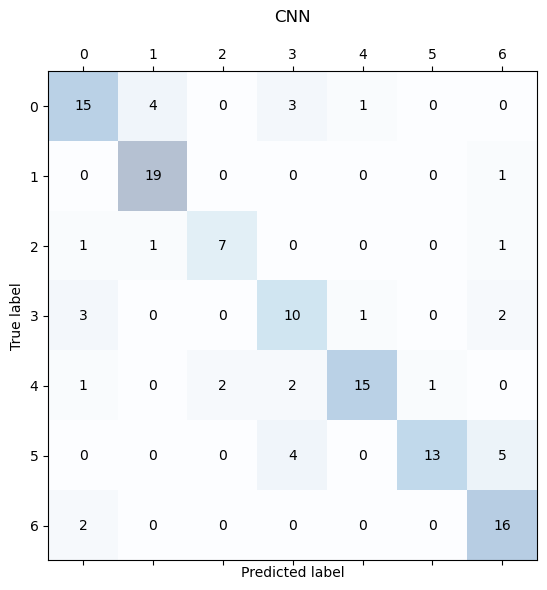

In [122]:
cm_3 = confusion_matrix(y_true = y_test, y_pred = y_predict)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm_3, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm_3.shape[0]):
    for j in range(cm_3.shape[1]):
        ax.text(x=j, y=i, s=cm_3[i, j], va='center', ha='center')

ax.title.set_text('CNN\n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig("ConfusionMatrix.png", dpi=300, format='png', pad_inches=0.3)
plt.show()

{0, 1, 2, 3, 4, 5, 6}

['african-wildcat' 'blackfoot-cat' 'chinese-mountain-cat' 'domestic-cat'
 'european-wildcat' 'jungle-cat' 'sand-cat']

In [123]:
from sklearn.metrics import precision_score, recall_score, f1_score

pScore3 = precision_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Precision: ", pScore3)

rScore3 = recall_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Recall: ", rScore3)

fScore3 = f1_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("F1-score: ", fScore3)

Precision:  0.7553228085983503
Recall:  0.7307692307692307
F1-score:  0.7306194145851428


### Predictions 

In [141]:
class_labels = ['african-wildcat', 'blackfoot-cat', 'chinese-mountain-cat', 'domestic-cat',
 'european-wildcat', 'jungle-cat', 'sand-cat']

In [125]:
imgFiles = glob.glob(r'C:\Users\ishaa\OneDrive\Documents\Deep Learning\Felis_Taxonomy\Felis_Taxonomy/*/*.jpg')


for item in imgFiles:
    print(item)

C:\Users\ishaa\OneDrive\Documents\Deep Learning\Felis_Taxonomy\Felis_Taxonomy\african-wildcat\af (1).jpg
C:\Users\ishaa\OneDrive\Documents\Deep Learning\Felis_Taxonomy\Felis_Taxonomy\african-wildcat\af (10).jpg
C:\Users\ishaa\OneDrive\Documents\Deep Learning\Felis_Taxonomy\Felis_Taxonomy\african-wildcat\af (11).jpg
C:\Users\ishaa\OneDrive\Documents\Deep Learning\Felis_Taxonomy\Felis_Taxonomy\african-wildcat\af (12).jpg
C:\Users\ishaa\OneDrive\Documents\Deep Learning\Felis_Taxonomy\Felis_Taxonomy\african-wildcat\af (13).jpg
C:\Users\ishaa\OneDrive\Documents\Deep Learning\Felis_Taxonomy\Felis_Taxonomy\african-wildcat\af (14).jpg
C:\Users\ishaa\OneDrive\Documents\Deep Learning\Felis_Taxonomy\Felis_Taxonomy\african-wildcat\af (15).jpg
C:\Users\ishaa\OneDrive\Documents\Deep Learning\Felis_Taxonomy\Felis_Taxonomy\african-wildcat\af (16).jpg
C:\Users\ishaa\OneDrive\Documents\Deep Learning\Felis_Taxonomy\Felis_Taxonomy\african-wildcat\af (17).jpg
C:\Users\ishaa\OneDrive\Documents\Deep Learning

In [143]:
def load_image(item):
    X_i = Image.open(item) 
    X_i = X_i.resize((299,299))
    X_i = np.array(X_i) / 255.0 # Normalize to range 0.0 to 1.0 (not stretching, only scaling)
     
    return X_i

In [127]:
import numpy as np

In [139]:
def Ensemble_Predict(image):

    pred_1 = ensemble_model1.predict(np.expand_dims(image, axis=0))
    pred_2 = ensemble_model2.predict(np.expand_dims(image, axis=0))
    pred_3 = ensemble_model3.predict(np.expand_dims(image, axis=0))

    
    ensemble_pred = (pred_1 + pred_2 + pred_3) / 3.0  # Adjust based on the number of models

    
    predicted_class = np.argmax(ensemble_pred, axis=1)[0]
    
    print(predicted_class)

    
    return class_labels[predicted_class]

In [144]:
import random
test_img = random.choice(X_test_std)
pred = Ensemble_Predict(test_img)
print("Class of the Image is predicted to be:",pred)

1/1 [==============================] - 0s 144ms/step
4
Class of the Image is predicted to be: european-wildcat
